# Notes: [Hopfield Model](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html)

The **Hopfield model**,consists of a network of $N$ neurons, labeled by a lower index $i$, with $1\leq i\leq N$.

neurons in the Hopfield model have only ***two states***. A neuron $i$ is ‘ON’ if its state variable takes the value $S_i=+1$ and ‘OFF’ (silent) if $S_i=−1$.

The dynamics evolves in discrete time with time steps $\Delta t$. If we take $\Delta t=1ms$, we can interpret $S_i(t)=+1$ as an ***action potential*** of neuron $i$ at time $t$. If we take $\Delta t=500ms$, $S_i(t)=+1$ should rather be interpreted as an episode of ***high firing rate***.

Neurons interact with each other with **weights** $w_{ij}$. The input potential of neuron $i$, influenced by the activity of other neurons is

$$h_i(t)=\sum_j w_{ij}S_j(t)$$

The input potential at time $t$ influences the **probabilistic update of the state variable** $S_i$ in the next time step:

$$Prob\left\{S_i(t+\Delta t)=+1|h_i(t)\right\}=g(h_i(t))=g(\sum_j w_{ij}S_j(t))$$

where $g$ is a monotonically increasing gain function with values between zero and one. A common choice is $g(h)=0.5[1+\mathrm{tanh}(\beta h)]$ with a parameter $\beta$. For $beta\rightarrow\infty$, we have $g(h)=1$ for $h>0$ and zero otherwise. The dynamics are therefore deterministic and summarized by the **update rule**

$$S_i(t+\Delta t)=\mathrm{sgn}\left[h(t)\right]$$


## Detour: Magnetic analogy

At high temperature, the magnetic moments of individual atoms point in all possible directions. 

Below a critical temperature, however, the magnetic moment of all atoms spontaneously align with each other. 

We assume that $w_{ij}=w_0>0$ between all pairs of neurons $i\neq j$. and that self-interaction vanishes, $w_{ii}=0$.
 
Each atom is characterized by a spin variable $S_i=\pm 1$ where $S_i=+1$ indicates that the magnetic moment of atom $i$ points 'upward'. Suppose that, at time $t=0$, all spins take a positive value ($S_I=+1$), except that of atom $i$ which has a value $S_i(0)=−1$. We calculate the probability that, at time step $t=\Delta t$, the spin of neuron $i$ will switch to $S_i=+1$.

$$\mathrm{Prob}\left\{S_i(t+\Delta t)=+1|h_i(t)\right\}=g(h_i(t))
=g(\sum_{j=1}^N w_{ij}S_j(t))=g(w_0(N-1))$$

where we have used our assumptions. With $g(h)=0.5\left[1+\mathrm{tanh}(\beta h)\right]$ and $w_0=\beta=1$, we find that for any network of more than three atoms, the probability that the magnetic moments of all atoms would align is extremely high.In physical systems, $\beta$ plays the role of an **inverse temperature**. If $\beta$ becomes small (high temperature), the magnetic moments no longer align and the material loses its spontaneous magnetization.

To model an **anti-ferromagnet**, we choose interactions $w_{ij}=+1$ if $i$ and $j$ belong to the same class (e.g., both are in a layer of type A or both in a layer of type B), and $w_{ij}=-1$ if one of the two atoms belongs to type A and the other to type B. 

The rule extracted from the anti-ferromagnet implies that pixels of opposite color are connected by negative weights, while pixels of the same color have connections with positive weight. This rule can be formalized as

$$w_{ij}=p_i p_j$$

This rule forms ***the basis of the Hopfield model***.

active $p_i=+1$

inactive $p_i=-1$

## Patterns in the Hopfield model


The task of the network is to store and recall M different patterns. **Patterns** are labeled by the index $\mu$ with $1\leq\mu\leq M$. 

Each **pattern** $\mu$ is defined as a desired configuration $\left\{p^{\mu}_i=\pm 1,1\leq i \leq M\right\}$. 

The network of $N$ neurons is said to correctly represent pattern $\mu$, if the state of all neurons $1\leq i\leq N$ is $S_i(t)=S_i(t+\Delta t)=p^{\mu}_i$. In other words, patterns must be fixed points of the dynamics.


During the ***set-up phase*** of the Hopfield network, a random number generator generates, for each **pattern** $\mu$ a string of $N$ independent binary numbers $\left\{p^{\mu}_i=\pm 1,1\leq i \leq M\right\}$ with expectation value $\langle p^\mu_i\rangle=0$. Strings of different patterns are independent. The weights are chosen as

$$w_{ij}=c\sum_{\mu=1}^M p^\mu_i p^\mu_j$$

with a positive constant $c>0$.


<img src='figures/8-17.7.png'/>

## Pattern retrieval

In order to mimic memory retrieval in the Hopfield model, an input is given by ***initializing*** the network in a state $S(t_0)={S_i(t_0),1\leq i\leq N}$.

In order to measure the similarity between the **current state**  $S(t)=\left\{S_i(t);1\leq i\leq N\right\}$ and a **pattern** $\mu$, we introduce the **overlap**

$$m^\mu(t)=\frac{1}{N}\sum_i p^\mu_i S_i(t)$$

The **overlap** takes a maximum value of $1$, if $S_i(t)=p^\mu_i$, i.e., if the **pattern** is retrieved. It is close to zero if the current state has no correlation with pattern $\mu$. The minimum value $m_\mu(t)=-1$ is achieved if each neuron takes the opposite value to that desired in pattern $\mu$.

the input potential $h_i$ of a neuron $i$ is

$$h_i(t)=\sum_j w_{ij} S_j(t)=
c\sum_{j=1}^N\sum_{\mu=1}^M p^\mu_i p^\mu_j S_j(t)=
c N \sum_{\mu=1}^M p^\mu_i m^\mu(t)$$

$$\mathrm{Prob}\left\{S_i(t+\Delta t)=+1|h_i(t)\right\}=
g\left[\sum_{\mu=1}^M p^\mu_i m^\mu(t)\right]$$


**Spurious correlations between pattern** $C^{\mu\nu}=(1/N)\sum_i p^{\mu}_i p^{\nu}_i$

## Memory capacity

Memory retrieval implies **pattern completion**, starting from a partial cue. An ___absolutely minimal condition___ for __pattern completion__ is ___that at least the dynamics should not move away from the pattern, if the initial cue is identical to the complete pattern___

i.e.

we require that a network with initial state $S_i(t_0)=p^{\nu}_i$ for $1\leq i\leq N$ stays in pattern $\nu$.

insert $S_j(t_0)=p^{\nu}_j$

$$
\begin{split}
S_i(t_0+\Delta t)&=\mathrm{sgn}\left[\frac{1}{N}\sum_{j=1}^N \sum_{\mu=1}^M p^{\mu}_i p^{\nu}_j S_j(t_0)\right]\\
&=\mathrm{sgn}\left[\frac{1}{N}\sum_{j=1}^N \sum_{\mu=1}^M p^{\mu}_i p^{\nu}_j p^{\nu}_j\right]\\
&=\mathrm{sgn}\left[p^{\nu}_i\left(\frac{1}{N}\sum_{j=1}^N p^{\nu}_j p^{\nu}_j\right)+
\frac{1}{N}\sum_{\mu\neq\nu}\sum_j p^{\mu}_i p^{\nu}_j p^{\nu}_j\right]\\
&=p^\nu_i\mathrm{sgn}\left[1+\frac{1}{N}\sum_j\sum_{\mu\neq\nu} p^{\mu}_i p^{\nu}_j p^{\mu}_j p^{\nu}_j\right]
(\text{because $p^\nu_i=\pm 1$})\\
&=p^\nu_i \mathrm{sgn}\left[1-\alpha^\nu_i\right]
\end{split}
$$


Define the **storage capacity** $C_{store}$ of a network as the maximal number $M^{max}$ of **patterns** that a network of $N$ **neurons** can retrieve

$$C_{store}=\frac{M^{max}}{N}=\frac{M^{max} N}{N^2}$$

he total number of bits that need to be stored at **maximum capacity** is $M^{max} N$. In the Hopfield model, **patterns** are stored by an appropriate choice of the synaptic connections. The number of available synapses in a fully connected network is $N^2$. Therefore, the **storage capacity** measures the number of bits stored per synapse.


The probability that the activity state of neuron $i$ **erroneously flips** is therefore proportional to

$$P_{error}=\frac{1}{\sqrt{2\pi}\sigma}\int^\infty_1 e^{\frac{-x^2}{2 \sigma^2}}\mathrm{d}x\approx\frac{1}{2}\left[1-\mathrm{erf}\left(\sqrt{\frac{N}{2M}}\right)\right]$$

error function

$$\mathrm{erf}(x)=\frac{1}{\sqrt{\pi}}\int_0^x e^{-y^2}\mathrm{d}y$$

# Codes: [Hopfield Network model of associative memory](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html)

## Get started

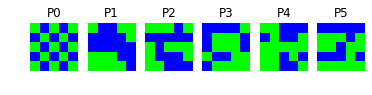

/usr/local/lib64/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


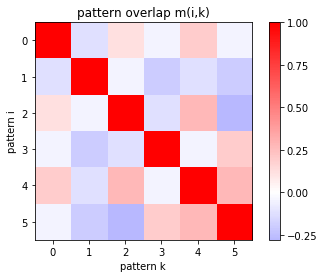

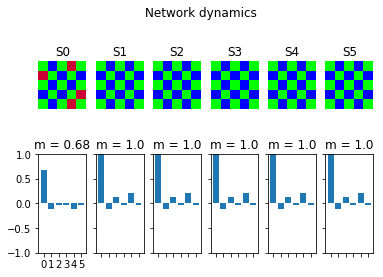

In [8]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [ ]:
network.HopfieldNetwork?

In [12]:
pattern_tools.PatternFactory?

In [18]:
pattern_tools.flip_n?

## Introduction: Hopfield-networks

## Exercise: N=4x4 Hopfield-network

### Question:Storing a single pattern

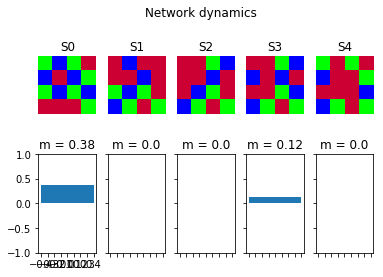

In [19]:
# nr_flipped_pixels=5
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

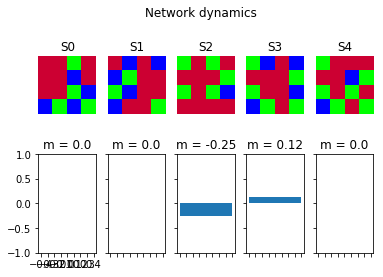

In [21]:
# nr_flipped_pixels=8

%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

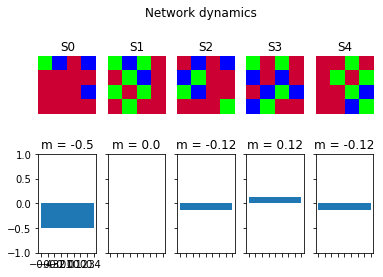

In [22]:
# nr_flipped_pixels>8

%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=12)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

### Question: the weights matrix

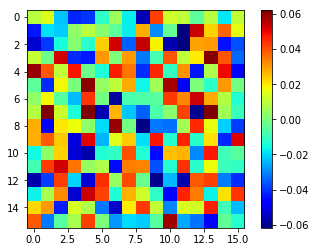

In [2]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
# object 1,2,3
pattern_size = 4
# Create a network with N=16 neurons.
hopfield_net1 = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
#size is 4
plot_tools.plot_nework_weights(hopfield_network=hopfield_net1)

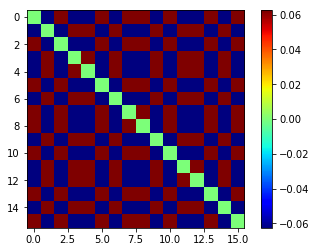

In [3]:
# object 4,5
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list=[checkerboard]
hopfield_net1.store_patterns(pattern_list)
# indifferent from thr former one ?
plot_tools.plot_nework_weights(hopfield_network=hopfield_net1)

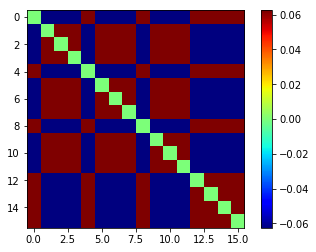

In [5]:
# object 6,7,8
pattern_size=4
# Create a network with N=16 neurons.
hopfield_net2=network.HopfieldNetwork(
    nr_neurons=pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
L_pattern = factory.create_L_pattern()
pattern_list=[L_pattern]
hopfield_net2.store_patterns(pattern_list)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net2)

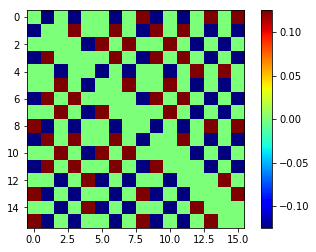

In [40]:
# object 9,10,11
import numpy as np
pattern_size = 4
# Create a network with N=16 neurons.
hopfield_net3 = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
L_pattern = factory.create_L_pattern()
pattern_list = [checkerboard,L_pattern]
hopfield_net3.store_patterns(pattern_list)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net3)

### Question (optional): Weights Distribution


(array([128.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0., 112.]),
 array([-0.0625, -0.05  , -0.0375, -0.025 , -0.0125,  0.    ,  0.0125,
         0.025 ,  0.0375,  0.05  ,  0.0625]),
 <a list of 10 Patch objects>)

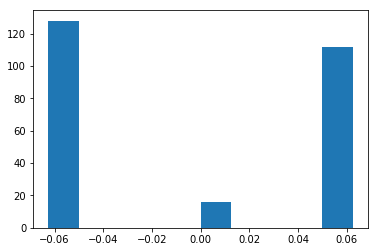

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(hopfield_net1.weights.flatten())

(array([126.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0., 114.]),
 array([-0.0625, -0.05  , -0.0375, -0.025 , -0.0125,  0.    ,  0.0125,
         0.025 ,  0.0375,  0.05  ,  0.0625]),
 <a list of 10 Patch objects>)

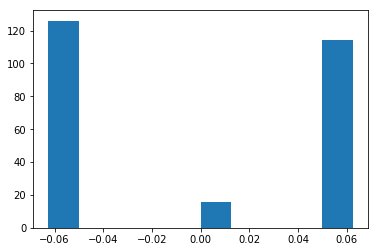

In [10]:
plt.hist(hopfield_net2.weights.flatten())

(array([ 64.,   0.,   0.,   0.,   0., 142.,   0.,   0.,   0.,  50.]),
 array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ,  0.125]),
 <a list of 10 Patch objects>)

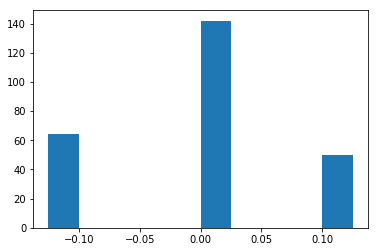

In [11]:
plt.hist(hopfield_net3.weights.flatten())

## Exercise: Capacity of an N=100 Hopfield-network

### Question

This is called associative memory because it recovers memories on the basis of similarity.

### Question

In [15]:
C_store=0.105
C_store=0.138
N=100
K=N*C_store
K

13.8

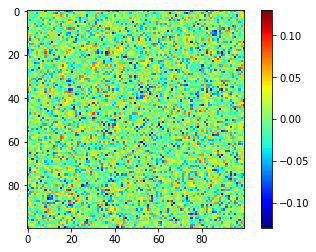

In [39]:
pattern_size=10
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard=factory.create_checkerboard()
random_pattern= factory.create_random_pattern_list(
    nr_patterns=int(np.floor(K-1)), on_probability=0.5)
pattern_list = [checkerboard]+random_pattern
hopfield_net.store_patterns(pattern_list)
hopfield_net.set_state_from_pattern(checkerboard)
hopfield_net.run(nr_steps=20000)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net)

It is symmetric in some sense

## Exercise: Non-random patterns

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


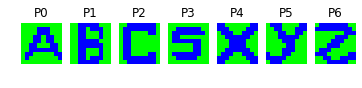

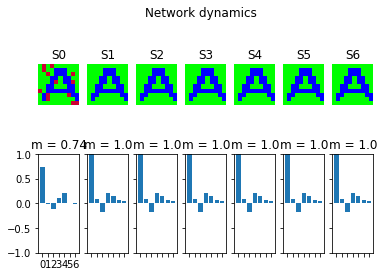

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [22]:
pattern_tools.reshape_patterns?

In [4]:
pattern_tools.get_noisy_copy?

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


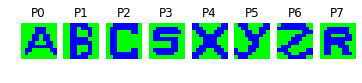

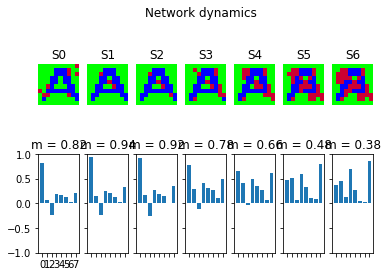

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','S', 'X', 'Y', 'Z','R']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

nope

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


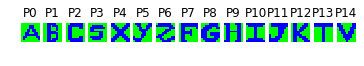

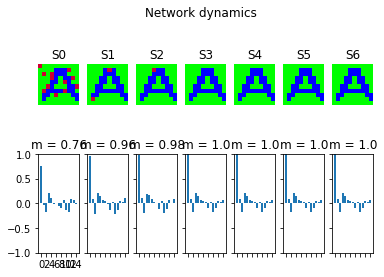

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A','B', 'C','S', 'X', 'Y', 'Z']
letter_add=['F','G','H','I','J','K','T','V']
letter_list+=letter_add

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)


abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

about 15 letters( This might be wrong)

## Exercise: Bonus